10. Исследование влияния обучения без учителя на эффективность обучения. Датасет: https://www.kaggle.com/sachinsharma1123/performance-prediction

In [25]:
import numpy as np 
import pandas as pd 
from sklearn import linear_model 
import io
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [26]:
data_set = pd.read_csv(r'/content/summary.csv')

In [27]:
data_set.head()

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,...,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


#Linear Regression
обучения c учители 

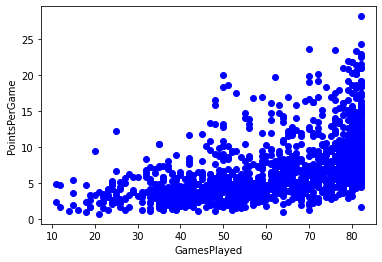

In [28]:
# Let's select some features to explore more :
data_set = data_set[["GamesPlayed","PointsPerGame"]]
# ENGINESIZE vs CO2EMISSIONS:
plt.scatter(data_set["GamesPlayed"] , data_set["PointsPerGame"] , color="blue")
plt.xlabel("GamesPlayed")
plt.ylabel("PointsPerGame")
plt.show()

In [29]:
# Generating training and testing data from our data:
# We are using 80% data for training.
train = data_set[:(int((len(data_set)*0.8)))]
test = data_set[(int((len(data_set)*0.8))):]

In [30]:
# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[["GamesPlayed"]])
train_y = np.array(train[["PointsPerGame"]])
regr.fit(train_x,train_y)

LinearRegression()

coefficients :  [[0.13204386]]
Intercept :  [-1.38285315]


Text(0, 0.5, 'PointsPerGame')

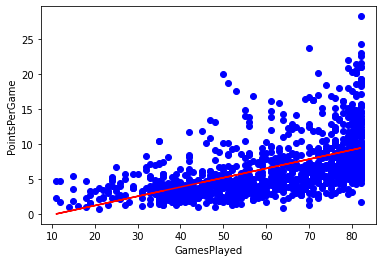

In [31]:
# The coefficients:
print ("coefficients : ",regr.coef_) #Slope
print ("Intercept : ",regr.intercept_) #Intercept
# Plotting the regression line:
plt.scatter(train["GamesPlayed"], train["PointsPerGame"], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel("GamesPlayed")
plt.ylabel("PointsPerGame")

In [32]:
# Predicting values:
# Function for predicting future values :
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values

In [33]:
# Predicting score for future game:
my_game_played = 90
estimatd_score = get_regression_predictions(my_game_played,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated score :",estimatd_score)

Estimated score : 10.501094662061828


In [34]:
# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[['GamesPlayed']])
test_y = np.array(test[['PointsPerGame']])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 3.09
Mean sum of squares (MSE): 18.49
R2-score: -2.60


#обучения без учителя (Classification) 
Классификация игрового времени баскетболиста

In [35]:
data_set = pd.read_csv(r'/content/summary.csv')

In [36]:
data_set.describe()

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [37]:
data_set.isnull().sum()


Name                  0
GamesPlayed           0
MinutesPlayed         0
PointsPerGame         0
FieldGoalsMade        0
FieldGoalsAttempt     0
FieldGoalPercent      0
3PointMade            0
3PointAttempt         0
3PointPercent        11
FreeThrowMade         0
FreeThrowAttempt      0
FreeThrowPercent      0
OffensiveRebounds     0
DefensiveRebounds     0
Rebounds              0
Assists               0
Steals                0
Blocks                0
Turnovers             0
Target                0
dtype: int64

In [38]:
# we fill zero value with the mean of all values
data_set['3PointPercent']=data_set['3PointPercent'].fillna(data_set['3PointPercent'].mean())

In [39]:
#we dont need names of players
data_set=data_set.drop(['Name'],axis=1)

Developing the Model and Finding the Best Solution

In [40]:
# Split the data into targets and features 
y = data_set['Target'] # take all the value of Targets
X = data_set.drop(['Target'],axis=1) # drop the column of Targets

In [41]:
# Use ANOVA to select best features
# Since the data is small enough, we will check many models and features to be comprehensive.

bestAcc = 0
numFeatures = 0
KNN_size = 0
logistic = False
SVM = False
tree = False
KNN = False
naive = False

# Check different models and their accuracies 
# Loop 1 through 10, for 1-10 amount of ANOVA features
for i in range(1,13):
        # Selection best i features        
        fvalue_selector = SelectKBest(f_classif, k=i)
        newX = fvalue_selector.fit_transform(X, y)
        
        X_train, X_test, y_train, y_test = train_test_split(newX, y, random_state=0, test_size=0.3)
        
        # Check Logistic Regression model
        logistic = LogisticRegression(max_iter = 10000)
        logistic.fit(X_train, y_train)
        prediction = logistic.predict(X_test)
        score = accuracy_score(y_test, prediction)
        if score > bestAcc:
            bestAcc = score
            logistic = True
            SVM = False
            tree = False
            KNN = False
            naive = False
            numFeatures = i
        
        # Check KNN model
        for j in range(1,10):
            knn = KNeighborsClassifier(n_neighbors = j)
            knn.fit(X_train, y_train)
            prediction = knn.predict(X_test)
            score = accuracy_score(y_test, prediction)
            if score > bestAcc:
                bestAcc = score
                numFeatures = i
                KNN_size = j
                logistic = False
                SVM = False
                tree = False
                KNN = True
                naive = False
                

        # Check Naive Bayes
        nb = GaussianNB()
        prediction = nb.fit(X_train, y_train).predict(X_test)
        score = accuracy_score(y_test, prediction)
        if score > bestAcc:
            bestAcc = score
            logistic = False
            SVM = False
            tree = False
            KNN = False
            naive = True
            numFeatures = i
        
        # Check SVM
        sv = svm.SVC()
        sv = sv.fit(X_train, y_train)
        prediction = sv.predict(X_test)
        score = accuracy_score(y_test, prediction)
        if score > bestAcc:
            bestAcc = score
            logistic = False
            SVM = True
            tree = False
            KNN = False
            naive = False
            numFeatures = i 
                
                
print("The best accuracy was", round(bestAcc, 5), ", using this many features:", numFeatures)


if logistic:
    print("Logistic was the best model.")
elif SVM:
    print("SVM was the best model.")
elif naive:
    print("Naive Bayes was the best model.")
else:
    print("KNN was the best model")

The best accuracy was 0.72886 , using this many features: 8
Logistic was the best model.


In [42]:
# See which features were important

selector = SelectKBest(f_classif, k=numFeatures)
selector.fit(X, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
topFeatures = X.iloc[:,cols]

print("The top 8 most important features were as follows")
list(topFeatures.columns)

The top 8 most important features were as follows


['GamesPlayed',
 'MinutesPlayed',
 'PointsPerGame',
 'FieldGoalsMade',
 'FreeThrowMade',
 'FreeThrowAttempt',
 'OffensiveRebounds',
 'Rebounds']

После проверки различных моделей с различными выбранными функциями я обнаружил, что идеальное количество функций - 8, чтобы предсказать, является ли игрок игроком более или менее 5 лет. Моя модель смогла предсказать с точностью 0,7288.

**Наиболее важными особенностями были**
* Сыгранные игры
* Сыгранные минуты
* Цели На местах, Достигнутые
* Выполненные Штрафные броски
* Попытки штрафного броска
* Атакующие подборы
* Подборы

Первые 2 имеют наибольший смысл, поскольку они логически были бы самой сильной корреляцией. Я не профессионал в баскетболе, поэтому я не знаю, что такое полевые голы, но корреляция штрафных бросков имеет смысл, поскольку многие игроки будут бросать их, независимо от позиции, аналогично подборам. Я подозреваю, что если бы у нас была функция определения позиций игроков, мы могли бы разработать модель с более высокой точностью, поскольку статистика, вероятно, сильно зависит от позиции игрока. Игнорирование позиций группирует статистику в одну, делая ее более общей.